# Fit Edge-Density ERGM to Ground-Truth

In [1]:
import Pkg
Pkg.activate("..")

  Activating project at `~/research/xaqlab/ergm.jl`


In [18]:
using ergm.sampler
using ergm.spaces
using ergm.stats
using ergm.models
using ergm.inference
using ergm.optim
using Random

n = 10
stats = DeltaStats(
    function(G)
        sum(G.adjacency) / (n * (n - 1))
    end,
    function(G, s, u)
        i, x = u
        [s[1] + (x - G[i]) / (n * (n - 1))]
    end
)
θ0 = 20
m = ExponentialFamily(stats, [θ0])
G0 = DiGraph(rand(Bool, (n, n)))
s = GibbsSampler(
    G0,
    m,
    10,
    10
)
Gs, ss = sample(s, 1000)
#o = ADAM(1.0, 0.7, 0.9, 1e-8, [0.0], 200, 0.0, "../logs/a.txt")
#o = SGD(10.0, [0.0], 200, 0.0, "../logs/a.txt")
o = Newton([0.0], 200, 0.0, "../logs/a.txt")
θs, Ls = mcmc_mle(Gs, m, o, 50, 10, 10)

([0.05978614272337045 0.23997996102938302 … 17.141325760911656 17.141325760911656], Any[0.0003188208641975452, 0.0022901541975309052, 0.0020824011111111387, 0.00239773444444446, 0.0030703912345679345, 0.0042495912345679185, 0.002574998641975335, 0.0012226677777777725, 0.003070391234567885, 0.00314471716049384  …  1.1635679012348165e-5, 2.183827160493893e-6, 3.1734444444447463e-5, 0.00020449000000000893, 0.00031093444444444643, 6.579012345675162e-7, 2.727160493826946e-7, 6.361604938274311e-6, 7.646530864197723e-5, 0.00015293444444443546], [0.5554111111111114], Any[[0.5375555555555555;;], [0.5075555555555554;;], [0.5097777777777778;;], [0.5064444444444446;;], [0.5;;], [0.4902222222222224;;], [0.5046666666666667;;], [0.5204444444444448;;], [0.5000000000000004;;], [0.4993333333333335;;]  …  [0.5519999999999999;;], [0.5568888888888892;;], [0.5497777777777778;;], [0.5411111111111111;;], [0.537777777777778;;], [0.5562222222222223;;], [0.5548888888888892;;], [0.5528888888888887;;], [0.54666666

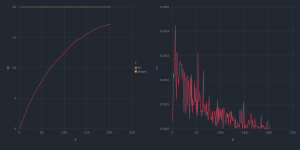

In [19]:
using Gadfly
using DataFrames

df = DataFrame(s = Int[], θ = Float64[], r = String[])
df2 = DataFrame(s = Int[], L = Float64[])

a(θ) = exp(θ / (n * (n - 1))) / (1 + exp(θ / (n * (n - 1))))

for s ∈ 1:size(θs, 2)
    push!(df, (s, θs[s], "fit"))
    push!(df, (s, θ0, "target"))
    push!(df2, (s, Ls[s]))
end

Gadfly.set_default_plot_size(30cm, 15cm)
Gadfly.with_theme(:dark) do
    hstack(
            plot(df, x=:s, y=:θ, color=:r, Geom.line),
            plot(df2, x=:s, y=:L, Geom.line)
    )
end

# Fit Edge-Triangle ERGM to Ground-Truth

In [8]:
using ergm.sampler
using ergm.spaces
using ergm.stats
using ergm.models
using ergm.inference
using ergm.optim
using LinearAlgebra
using Random

n = 30
stats = DeltaStats(
    function(G)
        [
            sum(G.adjacency) / (n * (n - 1)),
            tr(G.adjacency ^ 3) / (n * (n - 1) * (n - 2))
        ]
    end,
    function(G, s, u)
        i, x = u
        s + [
            (x - G[i]) / (n * (n - 1)),
            3 * (x - G[i]) * dot(G.adjacency[i[2], :], G.adjacency[:, i[1]]) / (n * (n - 1) * (n - 2))
        ]
    end
)
θ0 = [0.0, 1e4]
target_Es = [0.3, 0.035]
m = ExponentialFamily(stats, θ0)
G0 = DiGraph(convert(Matrix{Bool}, rand(Float64, (n, n)) .< target_Es[1]))

DiGraph(Bool[0 0 … 0 1; 0 0 … 1 1; … ; 1 0 … 0 0; 0 0 … 0 0], 30, 0)

In [9]:
o = ADAM(1000.0, 0.7, 0.9, 1e-8, θ0, 200, 0.0, "../logs/a.txt") #Newton(zeros(2), 20, 0.0, "../logs/a.txt")
θs, Ls, target_Es, Es = mcmc_mle_from_stats(target_Es, [G0], m, o, 1000, 10, 3)

([-999.9999857142533 -1999.9999714285068 … -1077.024449268622 -1077.024449268622; 9000.000010362694 8000.000020725387 … 1064.9457999572169 1064.9457999572169], Any[1.421224999999998, 1.421224999999998, 1.4212249999999975, 1.4212249999999975, 0.08523286137289497, 0.08803783058420364, 0.08881309474965192, 0.08872264000000007, 0.08803511264934213, 0.0863708466724975  …  0.0007908100734079532, 0.00041489804618093855, 0.0009415895597662052, 4.374629050996472e-5, 0.0008898288059512449, 4.753843638693645e-5, 0.0004854335180893718, 2.8631464351099433e-5, 0.0005550729172042404, 0.0004026971805528875], [0.3, 0.035], Any[[0.9999999999999982; 1.0000000000000002;;], [0.9999999999999982; 1.0000000000000002;;], [0.9999999999999982; 1.0;;], [0.9999999999999982; 1.0;;], [0.010158620689655005; 2.3399014778150824e-6;;], [0.00535977011494237; 4.926108374248033e-7;;], [0.004047126436781474; 1.2315270934956348e-7;;], [0.004199999999999862; -1.060485249962384e-17;;], [0.005364367816091796; 6.157635467902232e

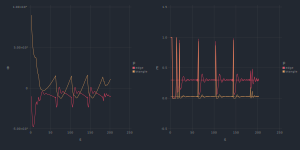

In [10]:
using Gadfly
using DataFrames

df = DataFrame(s = Int[], θ = Float64[], p = String[])
df2 = DataFrame(s = Int[], E = Float64[], p = String[], r = String[])
p_names = ["edge", "triangle"]

for p ∈ 1:length(get_params(m))
    for s ∈ 1:size(θs, 2)
        push!(df, (s, θs[p, s], p_names[p]))
        push!(df2, (s, Es[s][p], p_names[p], "fit"))
        push!(df2, (s, target_Es[p], p_names[p], "target"))
    end
end

Gadfly.set_default_plot_size(30cm, 15cm)
Gadfly.push_theme(:dark)
hstack([
        plot(df, x=:s, y=:θ, color=:p, Geom.line),
        plot(df2, x=:s, y=:E, color=:p, linestyle=:r, Geom.line)
])

┌ Info: Saved animation to 
│   fn = /home/will/research/xaqlab/ergm.jl/nbs/tmp.gif
└ @ Plots /home/will/.julia/packages/Plots/NQpB8/src/animation.jl:114


Plots.AnimatedGif("/home/will/research/xaqlab/ergm.jl/nbs/tmp.gif")
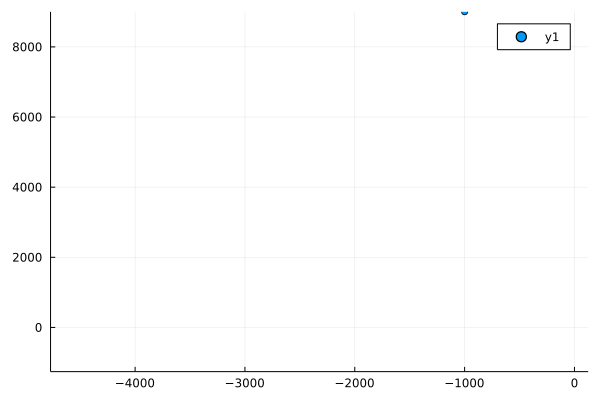

In [37]:
using Plots

df3 = unstack(df, :s, :p, :θ)
x = convert(Vector{Float64}, df3.edge)
y = convert(Vector{Float64}, df3.triangle)
p = scatter(1, xlim=extrema(x), ylim=extrema(y))

@gif for i = 1:nrow(df3)
    push!(p, x[i], y[i])
end every 1

┌ Info: Saved animation to 
│   fn = /home/will/research/xaqlab/ergm.jl/nbs/tmp.gif
└ @ Plots /home/will/.julia/packages/Plots/NQpB8/src/animation.jl:114


Plots.AnimatedGif("/home/will/research/xaqlab/ergm.jl/nbs/tmp.gif")
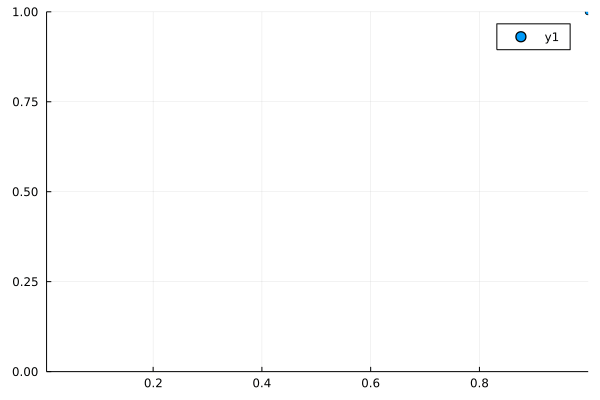

In [44]:
using Plots
using Pipe

df4 = @pipe df2 |>
    unstack(_, [:s, :r], :p, :E) |>
    filter(row -> row.r == "fit", _)
x = convert(Vector{Float64}, df4.edge)
y = convert(Vector{Float64}, df4.triangle)
p = scatter(1, xlim=extrema(x), ylim=extrema(y))

@gif for i = 1:nrow(df4)
    push!(p, x[i], y[i])
end every 1

In [45]:
o = Newton(θ0, 200, 0.0, "../logs/a.txt")
θs_n, Ls_n, target_Es_n, Es_n = mcmc_mle_from_stats(target_Es, [G0], m, o, 1000, 10, 3)

([-49.057231388951294 -1.9249256471874355e13 … 2.4258440692975425e47 2.4258440692975425e47; 10545.359149226664 1.9249256482369566e13 … -1.5454807922829332e50 -1.5454807922829332e50], Any[0.000353136812434461, 1.4212249999999975, 0.0912250000000001, 0.01240745474963633, 0.01240745474963633, 0.01240745474963633, 0.01240745474963633, 0.01240745474963633, 0.01240745474963633, 0.01240745474963633  …  0.01240745474963633, 0.01240745474963633, 0.01240745474963633, 0.01240745474963633, 0.01240745474963633, 0.01240745474963633, 0.01240745474963633, 0.01240745474963633, 0.01240745474963633, 0.01240745474963633], [0.3, 0.035], Any[[0.28384712643678117; 0.025396798029556623;;], [0.9999999999999982; 1.0;;], [-1.5959455978986625e-16; -3.686287386450715e-18;;], [0.40574712643677996; -3.686287386450715e-18;;], [0.40574712643677996; -3.686287386450715e-18;;], [0.40574712643677996; -3.686287386450715e-18;;], [0.40574712643677996; -3.686287386450715e-18;;], [0.40574712643677996; -3.686287386450715e-18;;]

In [56]:
θs_n[:, end]

2-element Vector{Float64}:
  2.4258440692975425e47
 -1.5454807922829332e50

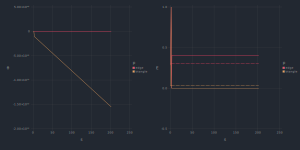

In [47]:
using Gadfly
using DataFrames

df_n = DataFrame(s = Int[], θ = Float64[], p = String[])
df2_n = DataFrame(s = Int[], E = Float64[], p = String[], r = String[])
p_names = ["edge", "triangle"]

for p ∈ 1:length(get_params(m))
    for s ∈ 1:size(θs, 2)
        push!(df_n, (s, θs_n[p, s], p_names[p]))
        push!(df2_n, (s, Es_n[s][p], p_names[p], "fit"))
        push!(df2_n, (s, target_Es_n[p], p_names[p], "target"))
    end
end

Gadfly.set_default_plot_size(30cm, 15cm)
Gadfly.push_theme(:dark)
hstack([
        plot(df_n, x=:s, y=:θ, color=:p, Geom.line),
        plot(df2_n, x=:s, y=:E, color=:p, linestyle=:r, Geom.line)
])

# Fit Triplet Motif ERGM to Ground-Truth

In [35]:
using ergm.sampler
using ergm.spaces
using ergm.stats
using ergm.models
using ergm.inference
using ergm.optim
using LinearAlgebra
using Random

n = 30
θ0 = 100 * randn(15)
m = ExponentialFamily(directed_triplet_stats, θ0)
G0 = DiGraph(rand(Bool, (n, n)))
s = ParallelGibbsSampler(
    G0,
    m,
    10,
    10,
    Threads.nthreads()
)
Gs, ss = sample(s, 1000)
o = ADAM(100.0, 0.5, 0.99, 1e-8, zeros(15), 100, 0.0, "../logs/a.txt")
θs, Ls, target_Es, Es = mcmc_mle(Gs, m, o, 1000, 3, 50)

([2.803898175206559 4.647757548235672 … -72.19147401084179 -72.19147401084179; 5.124640699928594 9.177076550933794 … 56.4736576031868 56.4736576031868; … ; 0.14760173447688252 -2.4056697532134743 … -0.6889774820478474 -0.6889774820478474; -1.661422256703865 -4.443036996879595 … 26.870951613721818 26.870951613721818], Any[6.413232613694429e-8, 6.799292933587779e-8, 1.0260033204724232e-7, 5.2277460627537e-8, 9.392681884489607e-8, 4.96935135528899e-8, 3.815441812874381e-8, 8.455031566732603e-8, 1.848449199342249e-8, 2.609707527485496e-8  …  1.0570809437524966e-7, 6.985809633012731e-8, 3.080883423526032e-8, 3.5358155648326255e-8, 1.0844168176588627e-7, 1.0256682230956858e-7, 8.231793014489274e-9, 6.562472194587937e-9, 1.1334243665766937e-8, 5.075334979414751e-8], [0.015714655172413786; 0.007901067323481108; … ; 0.015534852216748784; 0.0025896962233169147;;], Any[[0.015648973727421953; 0.00783115763546794; … ; 0.015531403940886687; 0.002601436781609201;;], [0.015682963875205208; 0.007853284

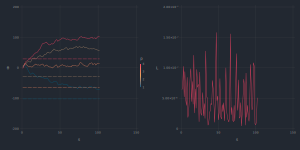

In [38]:
using Gadfly
using DataFrames

df = DataFrame(s = Int[], θ = Float64[], p = Int[], r = String[])
df2 = DataFrame(s = Int[], L = Float64[])

for p ∈ 1:length(get_params(m))
    for s ∈ 1:size(θs, 2)
        push!(df, (s, θs[p, s], p, "fit"))
        push!(df, (s, θ0[p], p, "target"))
        push!(df2, (s, Ls[s]))
    end
end

df = filter(r -> r.p < 5, df)

Gadfly.set_default_plot_size(30cm, 15cm)
Gadfly.with_theme(:dark) do
    hstack(
            plot(df, x=:s, y=:θ, color=:p, linestyle=:r, Geom.line),
            plot(df2, x=:s, y=:L, Geom.line)
    )
end

try second-order optimization with covariance estimate

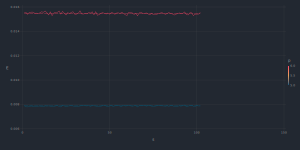

In [55]:
using Gadfly
using DataFrames

df3 = DataFrame(s = Int[], E = Float64[], p = Int[], r = String[])

for p ∈ 1:length(get_params(m))
    for s ∈ 1:size(θs, 2)
        push!(df3, (s, Es[s][p], p, "fit"))
        push!(df3, (s, target_Es[p], p, "target"))
    end
end

df4 = filter(r -> 5 <= r.p <= 6, df3)

Gadfly.set_default_plot_size(30cm, 15cm)
Gadfly.with_theme(:dark) do
    plot(df4, x=:s, y=:E, color=:p, linestyle=:r, Geom.line)
end

# Fit Directed Edge-Triangle (from Expectations)

In [2]:
using ergm.sampler
using ergm.spaces
using ergm.stats
using ergm.models
using ergm.inference
using ergm.optim
using LinearAlgebra
using Random

n = 30
stats = DeltaStats(
    function(G)
        p = sum(G.adjacency) / (n * (n - 1))
        [
            p,
            tr(G.adjacency ^ 3) / (n * (n - 1) * (n - 2)) - p ^ 3
        ]
    end,
    function(G, s, u)
        i, x = u
        p = s[1]
        dp = (x - G[i]) / (n * (n - 1))
        s + [
            dp,
            3 * (x - G[i]) * dot(G.adjacency[i[2], :], G.adjacency[:, i[1]]) / (n * (n - 1) * (n - 2)) - (p + dp) ^ 3 + p ^ 3
        ]
    end
)
# triangle density 5x E-R
#target_Es = [0.3, 0.05]
target_Es = [1e-2, 3e-6] # platinum-ish
m = ExponentialFamily(stats, zeros(2))
G0 = DiGraph(convert(Matrix{Bool}, rand(Float64, (n, n)) .< 0.1))
θ01 = log(target_Es[1] / (1 - target_Es[1])) * n * (n - 1)
θ0 = [θ01, 0.0]
o = ADAM(30.0, 0.5, 0.99, 1e-8, θ0, 1000, 0.0, "../logs/a.txt")
# o = Newton(zeros(2), 200, 0.0, "../logs/a.txt")
θs, Ls, _, Es = mcmc_mle_from_stats(target_Es, [G0], m, o, 1000, 3, 50)

([-4027.7367393641425 -4041.894543746419 … -3997.6012287491117 -3997.6012287491117; 3.6433629812947523 5.403388511475005 … 3784.484299599668 3784.484299599668], Any[0.23998747235609633, 3.864524029281709e-8, 1.9280100269493835e-7, 2.943507491732083e-7, 3.881268785977427e-7, 3.7957849508051414e-7, 3.276692576792963e-7, 2.639920676058334e-7, 3.9532025612038837e-7, 4.772224743428137e-7  …  5.6607486617402816e-11, 1.6877938944668533e-8, 1.8161989590570957e-9, 4.924528666283757e-9, 1.0239270260392701e-8, 1.1973116016493435e-9, 2.1995182270864862e-8, 3.6852853247335085e-8, 2.933748595431405e-8, 9.721142470635708e-10], [0.01, 3.0e-6], Any[[0.49988505747126677; -0.00031765942990763453;;], [0.009803448275862388; -5.580937802429395e-7;;], [0.009560919540230212; -5.819281439423154e-8;;], [0.009457471264368137; -6.49683123257061e-7;;], [0.009377011494253186; -4.928935132302956e-7;;], [0.009383908045977324; -3.302967922238437e-8;;], [0.009427586206896866; -4.215704842214585e-7;;], [0.00948620689655

In [11]:
Es_M = hcat(Es...)

2×1002 Matrix{Float64}:
  0.499885      0.00980345  …  0.00980805  0.00982874  0.00996897
 -0.000317659  -5.58094e-7     4.49254e-7  5.50047e-7  4.14837e-9

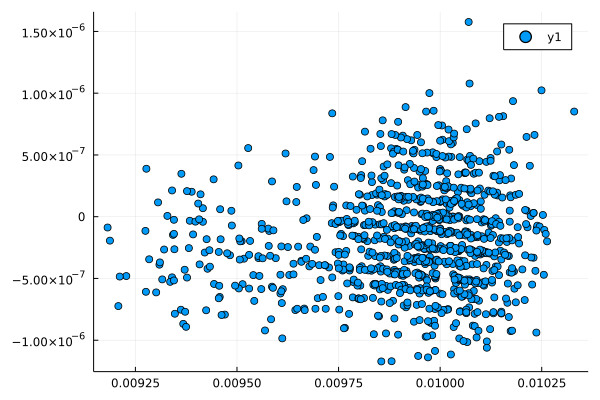

In [16]:
using Plots

ix = findall(abs.(Es_M[2, :]) .< 1e-4)
scatter(Es_M[1, ix], Es_M[2, ix])

In [6]:
using JLD

save("fit_plat_1000.jld", "θs", θs, "Ls", Ls, "Es", Es)

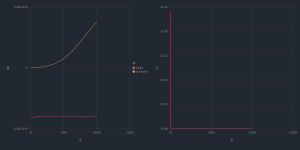

In [4]:
using Gadfly
using DataFrames

df = DataFrame(s = Int[], θ = Float64[], p = String[])
df2 = DataFrame(s = Int[], L = Float64[])
p_names = ["edge", "triangle"]

for p ∈ 1:length(get_params(m))
    for s ∈ 1:size(θs, 2)
        push!(df, (s, θs[p, s], p_names[p]))
        push!(df2, (s, Ls[s]))
    end
end

Gadfly.set_default_plot_size(30cm, 15cm)
Gadfly.with_theme(:dark) do
    hstack(
            plot(df, x=:s, y=:θ, color=:p, Geom.line),
            plot(df2, x=:s, y=:L, Geom.line)
    )
end

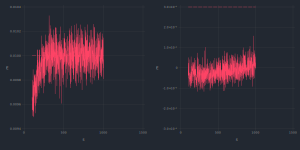

In [3]:
using Gadfly
using DataFrames

df = DataFrame(s = Int[], E = Float64[], p = Int[], r = String[])

for p ∈ 1:length(get_params(m))
    for s ∈ 100:size(θs, 2)
        push!(df, (s, Es[s][p], p, "fit"))
        push!(df, (s, target_Es[p], p, "target"))
    end
end

Gadfly.set_default_plot_size(30cm, 15cm)
Gadfly.with_theme(:dark) do
    hstack([
        plot(filter(r -> r.p == 1, df), x=:s, y=:E, linestyle=:r, Geom.line),
        plot(filter(r -> r.p ==2, df), x=:s, y=:E, linestyle=:r, Geom.line)
    ])
end

# Edge-Triangle From Expectations

In [78]:
sum(ER_Gs[1].adjacency) / (n * (n - 1))

0.296551724137931

In [95]:
using Statistics

n = 30
p = 0.3 # edge density

function sample_er(n, p, number_of_samples)
    [DiGraph(convert(Matrix{Bool}, rand(Float64, (n, n)) .< p)) for _ ∈ 1:number_of_samples]
end

ER_Gs = sample_er(n, p, 1000)
ER_Es = mean(hcat([get_stats(directed_triplet_stats, G) for G ∈ ER_Gs]...), dims=2)
target_Es = copy(ER_Es)
target_Es[5] /= 3
target_Es[6] *= 3

m = ExponentialFamily(directed_triplet_stats, zeros(15))
o = ADAM(50.0, 0.5, 0.99, 1e-8, zeros(15), 200, 0.0, "../logs/a.txt")
θs, Ls, _, Es = mcmc_mle_from_stats(target_Es, ER_Gs, m, o, 500, 3, 50)

([49.8837514811471 99.51042333122898 … 3358.274995926584 3358.274995926584; 45.644471268284256 90.29894057825952 … 2601.0995495559046 2601.0995495559046; … ; -49.30651860233672 -97.97877301333754 … -1496.2279414944048 -1496.2279414944048; -48.06919199212967 -95.21829752021257 … -1372.6630497909593 -1372.6630497909593], Any[0.0019594536404213825, 0.0018287261598143936, 0.0017106999402453176, 0.0015776588025825616, 0.0014885722566082495, 0.001411528157598054, 0.0012892734954018234, 0.001202729268493464, 0.001116231877443497, 0.0010244884218135288  …  3.30925375271984e-5, 0.00017023885351534504, 2.6404464061584766e-5, 8.376909303961322e-5, 0.00015463150123793033, 0.000222613910534982, 2.6003328785041247e-5, 0.0005534445432581472, 4.1449050431607345e-5, 0.00011716378958648353], [0.050269991789819335; 0.010744581280788167; … ; 0.0017043924466338238; 0.00012101806239737295;;], Any[[0.01545377668308706; 0.0077013136288998415; … ; 0.01565837438423641; 0.0025766009852216817;;], [0.0164812807881

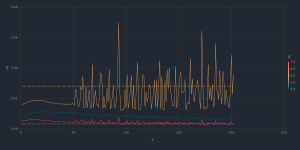

In [96]:
using Gadfly
using DataFrames

df = DataFrame(s = Int[], E = Float64[], p = Int[], r = String[])

for p ∈ 1:length(get_params(m))
    for s ∈ 1:size(θs, 2)
        push!(df, (s, Es[s][p], p, "fit"))
        push!(df, (s, target_Es[p], p, "target"))
    end
end

df = filter(r -> r.p ∈ [5, 6, 7], df)

Gadfly.set_default_plot_size(30cm, 15cm)
Gadfly.with_theme(:dark) do
    plot(df, x=:s, y=:E, color=:p, linestyle=:r, Geom.line)
end

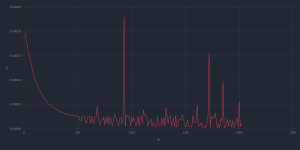

In [97]:
using Gadfly
using DataFrames

df2 = DataFrame(s = Int[], L = Float64[])

for p ∈ 1:length(get_params(m))
    for s ∈ 1:size(θs, 2)
        push!(df2, (s, Ls[s]))
    end
end

Gadfly.set_default_plot_size(30cm, 15cm)
Gadfly.with_theme(:dark) do
    plot(df2, x=:s, y=:L, Geom.line)
end

BFGS, ergodicity, bisect triangle parameter
intro to ERGM slides for Max